# Setup

## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

## Set figures and font sizes

In [2]:
plt.rcParams.update({'font.size': 16})

## Read data

In [3]:
df = pd.read_csv('patients.csv')

# Analysis

## Split dataframes

In [4]:
df_aborted = df[df["RT_aborted"] == 1]
df_completed= df[df["RT_aborted"] == 0]

## Characteristics


### All patients

In [5]:
df.describe()

,Unnamed: 0,RT_aborted,Age_at_brain_RT_start,Sex,Number_of_other_organs_with_mets,ECOG_at_brain_RT_start,Status_of_primary_tumor_at_brain_RT_start,Status_of_extracranial_mets_at_brain_RT_start,Steroids_before_brain_RT_start,Specialized_palliative_care_prior_to_brain_RT_start,RPA,GPA_version_2012
count,468.000000,468.000000,468.000000,468.000000,468.000000,452.000000,464.000000,455.000000,387.000000,149.000000,360.000000,286.000000
mean,233.500000,0.074786,65.196581,1.529915,1.495726,1.426991,0.482759,0.281319,0.751938,0.201342,2.391667,1.576923
std,135.244224,0.263328,10.879515,0.499638,1.433009,0.802699,0.500242,0.450138,0.432447,0.402356,0.610436,0.720155
min,0.000000,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,116.750000,0.000000,58.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,233.500000,0.000000,66.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,350.250000,0.000000,73.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000
max,467.000000,1.000000,91.000000,2.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000


In [6]:
print(df["Sex"].value_counts())
print("***********************************")
print(df["Sex"].value_counts(normalize=True))

Sex
2    248
1    220
Name: count, dtype: int64
***********************************
Sex
2    0.529915
1    0.470085
Name: proportion, dtype: float64


In [7]:
print(df["Status_of_primary_tumor_at_brain_RT_start"].value_counts())
print("***********************************")
print(df["Status_of_primary_tumor_at_brain_RT_start"].value_counts(normalize=True))

Status_of_primary_tumor_at_brain_RT_start
0.0    240
1.0    224
Name: count, dtype: int64
***********************************
Status_of_primary_tumor_at_brain_RT_start
0.0    0.517241
1.0    0.482759
Name: proportion, dtype: float64


In [8]:
print(df["Status_of_extracranial_mets_at_brain_RT_start"].value_counts())
print("***********************************")
print(df["Status_of_extracranial_mets_at_brain_RT_start"].value_counts(normalize=True))

Status_of_extracranial_mets_at_brain_RT_start
0.0    327
1.0    128
Name: count, dtype: int64
***********************************
Status_of_extracranial_mets_at_brain_RT_start
0.0    0.718681
1.0    0.281319
Name: proportion, dtype: float64


In [9]:
print(df["Number_of_brainmets_at_RT_start"].value_counts())
print("***********************************")
print(df["Number_of_brainmets_at_RT_start"].value_counts(normalize=True))

Number_of_brainmets_at_RT_start
3 or more                 217
1                         109
2                          77
Leptomeningeal disease     61
Name: count, dtype: int64
***********************************
Number_of_brainmets_at_RT_start
3 or more                 0.467672
1                         0.234914
2                         0.165948
Leptomeningeal disease    0.131466
Name: proportion, dtype: float64


In [10]:
print(df["RPA"].value_counts())
print("***********************************")
print(df["RPA"].value_counts(normalize=True))

RPA
2.0    171
3.0    165
1.0     24
Name: count, dtype: int64
***********************************
RPA
2.0    0.475000
3.0    0.458333
1.0    0.066667
Name: proportion, dtype: float64


In [11]:
print(df["GPA_version_2012"].value_counts())
print("***********************************")
print(df["GPA_version_2012"].value_counts(normalize=True))

GPA_version_2012
1.0    152
2.0    111
3.0     15
4.0      8
Name: count, dtype: int64
***********************************
GPA_version_2012
1.0    0.531469
2.0    0.388112
3.0    0.052448
4.0    0.027972
Name: proportion, dtype: float64


In [12]:
print(df["Steroids_before_brain_RT_start"].value_counts())
print("***********************************")
print(df["Steroids_before_brain_RT_start"].value_counts(normalize=True))

Steroids_before_brain_RT_start
1.0    291
0.0     96
Name: count, dtype: int64
***********************************
Steroids_before_brain_RT_start
1.0    0.751938
0.0    0.248062
Name: proportion, dtype: float64


In [13]:
print(df["RT_technique"].value_counts())
print("***********************************")
print(df["RT_technique"].value_counts(normalize=True))

RT_technique
Whole brain radiotherapy      341
Stereotactic radiotherapy      81
Partial brain radiotherapy     46
Name: count, dtype: int64
***********************************
RT_technique
Whole brain radiotherapy      0.728632
Stereotactic radiotherapy     0.173077
Partial brain radiotherapy    0.098291
Name: proportion, dtype: float64


### Patients who aborted RT

In [14]:
df_aborted.describe()

,Unnamed: 0,RT_aborted,Age_at_brain_RT_start,Sex,Number_of_other_organs_with_mets,ECOG_at_brain_RT_start,Status_of_primary_tumor_at_brain_RT_start,Status_of_extracranial_mets_at_brain_RT_start,Steroids_before_brain_RT_start,Specialized_palliative_care_prior_to_brain_RT_start,RPA,GPA_version_2012
count,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,34.000000,34.000000,34.000000,14.000000,31.000000,25.00000
mean,222.057143,1.0,64.828571,1.514286,1.771429,1.857143,0.470588,0.147059,0.852941,0.428571,2.645161,1.40000
std,128.606317,0.0,10.612107,0.507093,1.308023,0.809606,0.506640,0.359491,0.359491,0.513553,0.550659,0.57735
min,9.000000,1.0,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,113.500000,1.0,58.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000
50%,253.000000,1.0,69.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.00000
75%,319.500000,1.0,72.000000,2.000000,3.000000,2.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2.00000
max,429.000000,1.0,82.000000,2.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.00000


In [15]:
print(df_aborted["Sex"].value_counts())
print("***********************************")
print(df_aborted["Sex"].value_counts(normalize=True))

Sex
2    18
1    17
Name: count, dtype: int64
***********************************
Sex
2    0.514286
1    0.485714
Name: proportion, dtype: float64


In [16]:
print(df_aborted["Status_of_primary_tumor_at_brain_RT_start"].value_counts())
print("***********************************")
print(df_aborted["Status_of_primary_tumor_at_brain_RT_start"].value_counts(normalize=True))

Status_of_primary_tumor_at_brain_RT_start
0.0    18
1.0    16
Name: count, dtype: int64
***********************************
Status_of_primary_tumor_at_brain_RT_start
0.0    0.529412
1.0    0.470588
Name: proportion, dtype: float64


In [17]:
print(df_aborted["Status_of_extracranial_mets_at_brain_RT_start"].value_counts())
print("***********************************")
print(df_aborted["Status_of_extracranial_mets_at_brain_RT_start"].value_counts(normalize=True))

Status_of_extracranial_mets_at_brain_RT_start
0.0    29
1.0     5
Name: count, dtype: int64
***********************************
Status_of_extracranial_mets_at_brain_RT_start
0.0    0.852941
1.0    0.147059
Name: proportion, dtype: float64


In [18]:
print(df_aborted["Number_of_brainmets_at_RT_start"].value_counts())
print("***********************************")
print(df_aborted["Number_of_brainmets_at_RT_start"].value_counts(normalize=True))

Number_of_brainmets_at_RT_start
3 or more                 19
Leptomeningeal disease     7
1                          5
2                          4
Name: count, dtype: int64
***********************************
Number_of_brainmets_at_RT_start
3 or more                 0.542857
Leptomeningeal disease    0.200000
1                         0.142857
2                         0.114286
Name: proportion, dtype: float64


In [19]:
print(df_aborted["RPA"].value_counts())
print("***********************************")
print(df_aborted["RPA"].value_counts(normalize=True))

RPA
3.0    21
2.0     9
1.0     1
Name: count, dtype: int64
***********************************
RPA
3.0    0.677419
2.0    0.290323
1.0    0.032258
Name: proportion, dtype: float64


In [20]:
print(df_aborted["GPA_version_2012"].value_counts())
print("***********************************")
print(df_aborted["GPA_version_2012"].value_counts(normalize=True))

GPA_version_2012
1.0    16
2.0     8
3.0     1
Name: count, dtype: int64
***********************************
GPA_version_2012
1.0    0.64
2.0    0.32
3.0    0.04
Name: proportion, dtype: float64


In [21]:
print(df_aborted["Steroids_before_brain_RT_start"].value_counts())
print("***********************************")
print(df_aborted["Steroids_before_brain_RT_start"].value_counts(normalize=True))

Steroids_before_brain_RT_start
1.0    29
0.0     5
Name: count, dtype: int64
***********************************
Steroids_before_brain_RT_start
1.0    0.852941
0.0    0.147059
Name: proportion, dtype: float64


In [22]:
print(df_aborted["RT_technique"].value_counts())
print("***********************************")
print(df_aborted["RT_technique"].value_counts(normalize=True))

RT_technique
Whole brain radiotherapy      30
Stereotactic radiotherapy      3
Partial brain radiotherapy     2
Name: count, dtype: int64
***********************************
RT_technique
Whole brain radiotherapy      0.857143
Stereotactic radiotherapy     0.085714
Partial brain radiotherapy    0.057143
Name: proportion, dtype: float64


### Patients who completed RT

In [23]:
df_completed.describe()

,Unnamed: 0,RT_aborted,Age_at_brain_RT_start,Sex,Number_of_other_organs_with_mets,ECOG_at_brain_RT_start,Status_of_primary_tumor_at_brain_RT_start,Status_of_extracranial_mets_at_brain_RT_start,Steroids_before_brain_RT_start,Specialized_palliative_care_prior_to_brain_RT_start,RPA,GPA_version_2012
count,433.000000,433.0,433.000000,433.000000,433.000000,417.000000,430.000000,421.000000,353.000000,135.000000,329.000000,261.000000
mean,234.424942,0.0,65.226328,1.531178,1.473441,1.390887,0.483721,0.292162,0.742210,0.177778,2.367781,1.593870
std,135.866542,0.0,10.912300,0.499604,1.441727,0.792521,0.500317,0.455297,0.438039,0.383750,0.611123,0.731043
min,0.000000,0.0,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,117.000000,0.0,58.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,231.000000,0.0,66.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,356.000000,0.0,73.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000
max,467.000000,0.0,91.000000,2.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000


In [24]:
print(df_completed["Sex"].value_counts())
print("***********************************")
print(df_completed["Sex"].value_counts(normalize=True))

Sex
2    230
1    203
Name: count, dtype: int64
***********************************
Sex
2    0.531178
1    0.468822
Name: proportion, dtype: float64


In [25]:
print(df_completed["Status_of_primary_tumor_at_brain_RT_start"].value_counts())
print("***********************************")
print(df_completed["Status_of_primary_tumor_at_brain_RT_start"].value_counts(normalize=True))

Status_of_primary_tumor_at_brain_RT_start
0.0    222
1.0    208
Name: count, dtype: int64
***********************************
Status_of_primary_tumor_at_brain_RT_start
0.0    0.516279
1.0    0.483721
Name: proportion, dtype: float64


In [26]:
print(df_completed["Status_of_extracranial_mets_at_brain_RT_start"].value_counts())
print("***********************************")
print(df_completed["Status_of_extracranial_mets_at_brain_RT_start"].value_counts(normalize=True))

Status_of_extracranial_mets_at_brain_RT_start
0.0    298
1.0    123
Name: count, dtype: int64
***********************************
Status_of_extracranial_mets_at_brain_RT_start
0.0    0.707838
1.0    0.292162
Name: proportion, dtype: float64


In [27]:
print(df_completed["Number_of_brainmets_at_RT_start"].value_counts())
print("***********************************")
print(df_completed["Number_of_brainmets_at_RT_start"].value_counts(normalize=True))

Number_of_brainmets_at_RT_start
3 or more                 198
1                         104
2                          73
Leptomeningeal disease     54
Name: count, dtype: int64
***********************************
Number_of_brainmets_at_RT_start
3 or more                 0.461538
1                         0.242424
2                         0.170163
Leptomeningeal disease    0.125874
Name: proportion, dtype: float64


In [28]:
print(df_completed["RPA"].value_counts())
print("***********************************")
print(df_completed["RPA"].value_counts(normalize=True))

RPA
2.0    162
3.0    144
1.0     23
Name: count, dtype: int64
***********************************
RPA
2.0    0.492401
3.0    0.437690
1.0    0.069909
Name: proportion, dtype: float64


In [29]:
print(df_completed["GPA_version_2012"].value_counts())
print("***********************************")
print(df_completed["GPA_version_2012"].value_counts(normalize=True))

GPA_version_2012
1.0    136
2.0    103
3.0     14
4.0      8
Name: count, dtype: int64
***********************************
GPA_version_2012
1.0    0.521073
2.0    0.394636
3.0    0.053640
4.0    0.030651
Name: proportion, dtype: float64


In [30]:
print(df_completed["Steroids_before_brain_RT_start"].value_counts())
print("***********************************")
print(df_completed["Steroids_before_brain_RT_start"].value_counts(normalize=True))

Steroids_before_brain_RT_start
1.0    262
0.0     91
Name: count, dtype: int64
***********************************
Steroids_before_brain_RT_start
1.0    0.74221
0.0    0.25779
Name: proportion, dtype: float64


In [31]:
print(df_completed["RT_technique"].value_counts())
print("***********************************")
print(df_completed["RT_technique"].value_counts(normalize=True))

RT_technique
Whole brain radiotherapy      311
Stereotactic radiotherapy      78
Partial brain radiotherapy     44
Name: count, dtype: int64
***********************************
RT_technique
Whole brain radiotherapy      0.718245
Stereotactic radiotherapy     0.180139
Partial brain radiotherapy    0.101617
Name: proportion, dtype: float64


## Plots

### Age

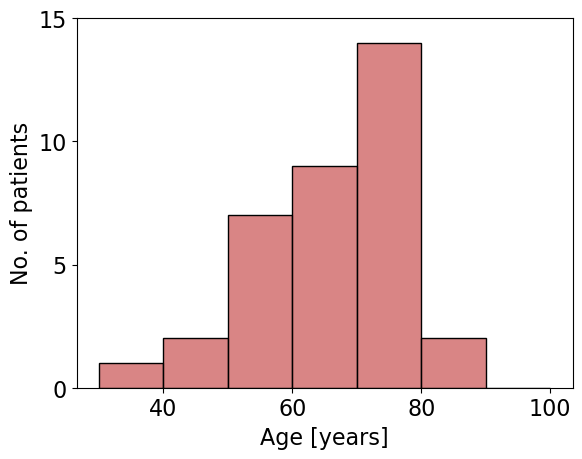

In [32]:
# Patients who aborted RT
fig, ax = plt.subplots()
sns.histplot(data=df_aborted, x="Age_at_brain_RT_start", binwidth=10, binrange=(30,100), color="indianred")
ax.set_xlabel("Age [years]")
ax.set_ylabel("No. of patients")
ax.set_yticks(np.arange(0,16,5))
fig.savefig("plots/Age_at_brain_RT_start_aborted.png", bbox_inches='tight')

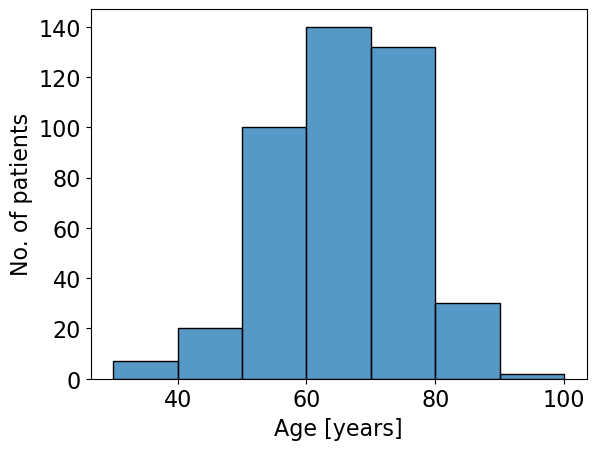

In [33]:
# Patients who completed RT
fig, ax = plt.subplots()
sns.histplot(data=df_completed, x="Age_at_brain_RT_start", binwidth=10, binrange=(30,100))
ax.set_xlabel("Age [years]")
ax.set_ylabel("No. of patients")
fig.savefig("plots/Age_at_brain_RT_start_completed.png", bbox_inches='tight')

### Number of other organs with metastases

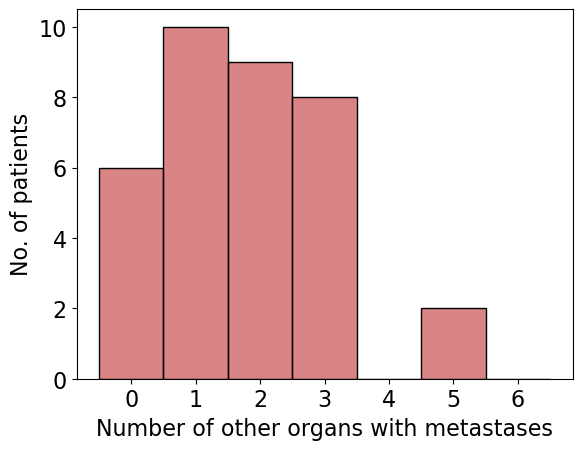

In [34]:
# Patients who aborted RT
fig, ax = plt.subplots()
sns.histplot(data=df_aborted, x="Number_of_other_organs_with_mets", binwidth=1, binrange=(-0.5,6.5), color="indianred")
ax.set_xlabel("Number of other organs with metastases")
ax.set_xticks(np.arange(0, 7, 1))
ax.set_ylabel("No. of patients")
fig.savefig("plots/Number_of_other_organs_with_mets_aborted.png", bbox_inches='tight')

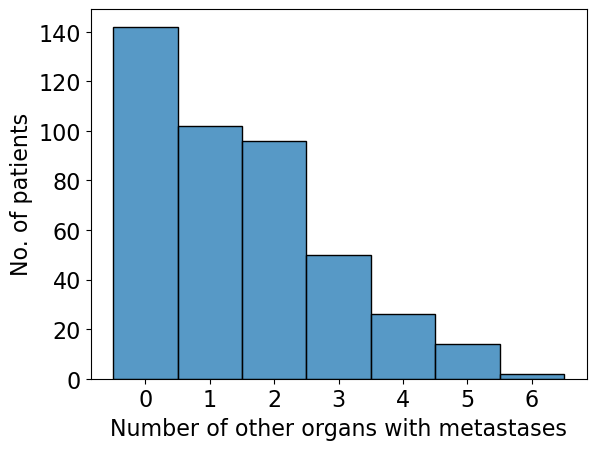

In [35]:
# Patients who completed RT
fig, ax = plt.subplots()
sns.histplot(data=df_completed, x="Number_of_other_organs_with_mets", binwidth=1, binrange=(-0.5,6.5))
ax.set_xlabel("Number of other organs with metastases")
ax.set_xticks(np.arange(0, 7, 1))
ax.set_ylabel("No. of patients")
fig.savefig("plots/Number_of_other_organs_with_mets_completed.png", bbox_inches='tight')

### ECOG at brain RT start

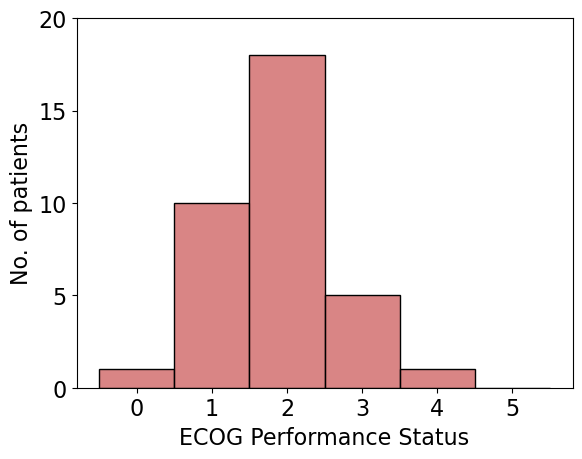

In [36]:
# Patients who aborted RT
fig, ax = plt.subplots()
sns.histplot(data=df_aborted, x="ECOG_at_brain_RT_start", binwidth=1, binrange=(-0.5,5.5), color="indianred")
ax.set_xlabel("ECOG Performance Status")
ax.set_xticks(np.arange(0, 6, 1))
ax.set_yticks(np.arange(0, 21, 5))
ax.set_ylabel("No. of patients")
fig.savefig("plots/ECOG_at_brain_RT_start_aborted.png", bbox_inches='tight')

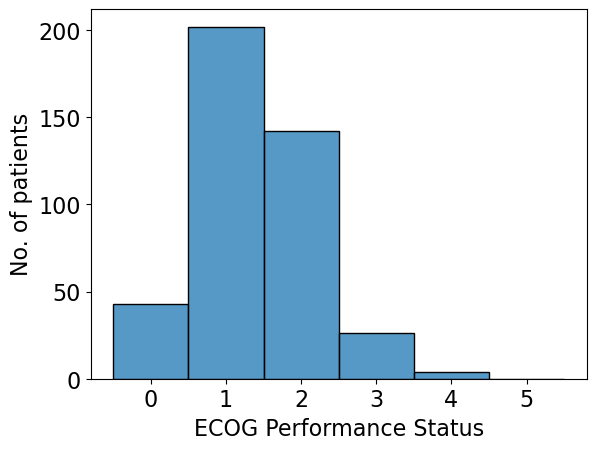

In [37]:
# Patients who completed RT
fig, ax = plt.subplots()
sns.histplot(data=df_completed, x="ECOG_at_brain_RT_start", binwidth=1, binrange=(-0.5,5.5))
ax.set_xlabel("ECOG Performance Status")
ax.set_xticks(np.arange(0, 6, 1))
ax.set_ylabel("No. of patients")
fig.savefig("plots/ECOG_at_brain_RT_start_completed.png", bbox_inches='tight')


## RPA

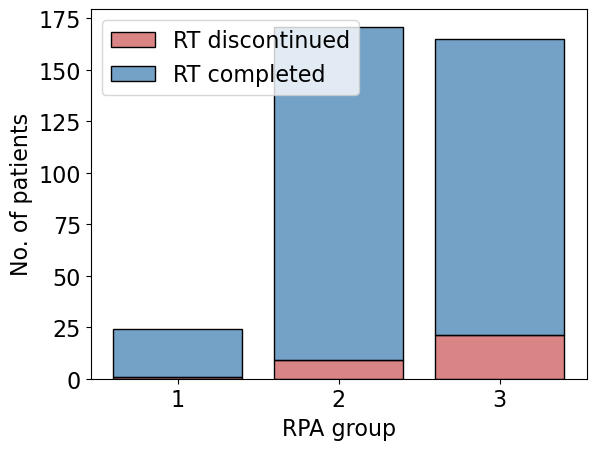

In [38]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="RPA", hue="RT_aborted", multiple="stack", shrink=.8, binwidth=1, binrange=(0.5,3.5), palette=["steelblue", "indianred"])
ax.set_xlabel("RPA group")
ax.set_xticks(np.arange(1, 4, 1))
ax.set_ylabel("No. of patients")
plt.legend(labels=["RT discontinued", "RT completed"], loc="upper left")
fig.savefig("plots/RPA.png", bbox_inches='tight')

## GPA

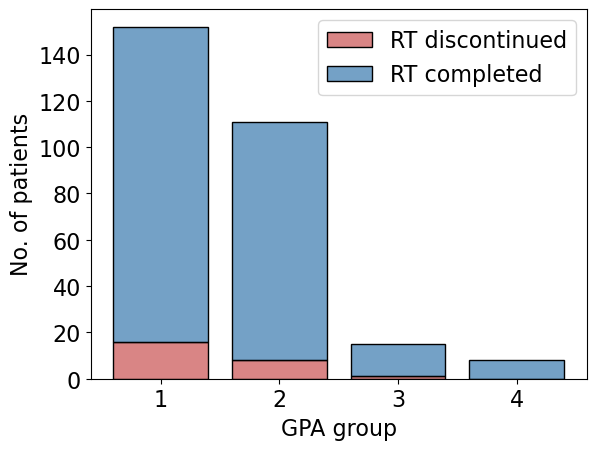

In [39]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="GPA_version_2012", hue="RT_aborted", multiple="stack", shrink=.8, binwidth=1, binrange=(0.5,4.5), palette=["steelblue", "indianred"])
ax.set_xlabel("GPA group")
ax.set_xticks(np.arange(1, 5, 1))
ax.set_ylabel("No. of patients")
plt.legend(labels=["RT discontinued", "RT completed"], loc="upper right")
fig.savefig("plots/GPA.png", bbox_inches='tight')

# Statistical tests

## GPA

In [40]:
df.head()

,Unnamed: 0,RT_aborted,Age_at_brain_RT_start,Sex,Primary_tumor_histology,Number_of_brainmets_at_RT_start,Number_of_other_organs_with_mets,ECOG_at_brain_RT_start,Status_of_primary_tumor_at_brain_RT_start,Status_of_extracranial_mets_at_brain_RT_start,RT_technique,Steroids_before_brain_RT_start,Specialized_palliative_care_prior_to_brain_RT_start,RPA,GPA_version_2012
0,0,0,26,2,Breast,Leptomeningeal disease,0,1.0,1.0,0.0,Whole brain radiotherapy,0.0,0.0,1.0,2.0
1,1,0,28,2,Breast,Leptomeningeal disease,2,3.0,0.0,0.0,Whole brain radiotherapy,0.0,0.0,3.0,2.0
2,2,0,32,2,Breast,3 or more,0,NaN,1.0,0.0,Whole brain radiotherapy,0.0,NaN,NaN,NaN
3,3,0,32,2,Breast,3 or more,0,NaN,1.0,0.0,Whole brain radiotherapy,0.0,NaN,NaN,NaN
4,4,0,32,2,Breast,NaN,0,NaN,0.0,0.0,Whole brain radiotherapy,NaN,NaN,NaN,NaN


In [41]:
gpa_crosstab = pd.crosstab(df["RT_aborted"], df["GPA_version_2012"], margins=False)
gpa_crosstab

GPA_version_2012,1.0,2.0,3.0,4.0
RT_aborted,,,,
0,136,103,14,8
1,16,8,1,0


In [42]:
gpa_result = chi2_contingency(gpa_crosstab)
gpa_result

Chi2ContingencyResult(statistic=1.7818250628123589, pvalue=0.6188979699507668, dof=3, expected_freq=array([[138.71328671, 101.2972028 ,  13.68881119,   7.3006993 ],
       [ 13.28671329,   9.7027972 ,   1.31118881,   0.6993007 ]]))

## RPA

In [43]:
rpa_crosstab = pd.crosstab(df["RT_aborted"], df["RPA"], margins=False)
rpa_crosstab

RPA,1.0,2.0,3.0
RT_aborted,,,
0,23,162,144
1,1,9,21


In [44]:
rpa = chi2_contingency(rpa_crosstab)
rpa

Chi2ContingencyResult(statistic=6.590344958296407, pvalue=0.037061652133702175, dof=2, expected_freq=array([[ 21.93333333, 156.275     , 150.79166667],
       [  2.06666667,  14.725     ,  14.20833333]]))